In [4]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [5]:
#Read the given dataset file and drop the 1st column from the file
dataframe = pd.read_csv("C:\\Users\\Gulfam Hussain\\Desktop\\Gulfam- Course\\574-Intro to ML\\Project1\\wdbc.csv", header=None)
dataframe = dataframe.drop(dataframe.columns[0], axis=1)

In [6]:
#Map the values of 1st column to 1 and 0 accordingly
ycolumn_values = dataframe[dataframe.columns[0]]
ycolumn_values = ycolumn_values.map({'M':1, 'B':0})
dataframe[dataframe.columns[0]] = ycolumn_values

In [7]:
#Divide and assign the dataset values into X & Y accordingly
ycolumn_values = ycolumn_values.to_frame()
xcolumn_values = dataframe[dataframe.columns[1:]]

In [8]:
#Partition the given dataset values into Training, Validation & Testing to perform the logistic regression
xtraining_data, xtesting_data, ytraining_data, ytesting_data = train_test_split(xcolumn_values, ycolumn_values, test_size=0.2, random_state=10)
xvalidation_data, xtestingNew, yvalidation_data, ytestingNew = train_test_split(xtesting_data, ytesting_data, test_size=0.5, random_state=10)

In [9]:
#Put the Y values in the array format and reshape for logistic regression use
YTr = ytraining_data.values
YVal = yvalidation_data.values
YTest = ytestingNew.values
YTr = YTr.reshape(1,YTr.shape[0])
YVal = YVal.reshape(1,YVal.shape[0])
YTest = YTest.reshape(1,YTest.shape[0])

In [10]:
#Normalize the X dataset values so that the values are in the same range while performing the logistic regression
XTr_normalize = preprocessing.normalize(xtraining_data, norm="l2")  
XVal_normalize = preprocessing.normalize(xvalidation_data, norm="l2")
XTest_normalize = preprocessing.normalize(xtestingNew, norm="l2")
XTr = XTr_normalize.T
XVal = XVal_normalize.T
XTe = XTest_normalize.T

In [30]:
#Define sigmoid function for logistic regression --Reference taken from the class slide
def sigmoid(y):
    return(1/(1+np.exp(-y)))

#Initialization of the values before calculating the loss fucntion
losstraining = []
lossval = []
m = XTr.shape[1]
m1 = XVal.shape[1]
b = 0   #bias
learningrate = 0.13               #0.13 (Optimal for 92.98% accuracy)
w = np.zeros([XTr.shape[0], 1])   #weight vector

In [31]:
#Iterate the loss function over range of epochs in order to calculate the weight and bias --Reference taken from the class slide
for epoch in range(15000):
    z = np.dot(w.T, XTr) + b
    z1 = np.dot(w.T, XVal) + b
    p = sigmoid(z)  #predicted value
    p1 = sigmoid(z1)
    cost = -np.sum(np.multiply(np.log(p), YTr) + np.multiply((1-YTr), np.log(1-p)))/m         #training loss
    cost1 = -np.sum(np.multiply(np.log(p1), YVal) + np.multiply((1-YVal), np.log(1-p1)))/m1   #validation loss
    dz = p - YTr
    losstraining.append(np.squeeze(cost))
    lossval.append(np.squeeze(cost1))
    
    dw = (1/m)*np.dot(XTr, dz.T)
    db = (1/m)*np.sum(dz)
    
    w = w - learningrate*dw
    b = b - learningrate*db

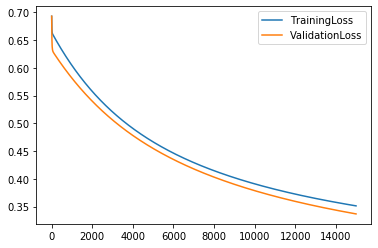

In [32]:
#Plot the graph of Training Loss and Validation Loss over multiple iterations
plt.plot(losstraining, label = 'TrainingLoss')
plt.plot(lossval, label = 'ValidationLoss')
plt.legend()

In [33]:
#Finally calculate the Test value after getting the weight value from multiple iterations on training data
Test_Prediction = np.dot(w.T, XTe) + b

#Apply sigmoid funtion to normalize the Test dataset values in the range of 0-1.
Final_Prediction = sigmoid(Test_Prediction)

#Get the final predicted values and categorize them into 0 or 1.
Final_Prediction[Final_Prediction>0.5] = 1
Final_Prediction[Final_Prediction<0.5] = 0
Final_Prediction = Final_Prediction.astype(int)

In [34]:
#Calculate Confusion Matrix to predict the Accuracy, Precision & Recall values
Matrix_check = confusion_matrix(YTest[0], Final_Prediction[0])

TP = Matrix_check[0][0]
FP = Matrix_check[0][1]
FN = Matrix_check[1][0]
TN = Matrix_check[1][1]

In [35]:
#Calculate values of Accuracy, Precision & Recall values based on the confusion matrix values
Acc_value = (TP+TN)/(TP+TN+FP+FN)
Pre_value = TP/(TP+FP)
Rec_value = TP/(TP+FN)

print("Accuracy  %  : ", Acc_value*100)
print("Precision %  : ", Pre_value*100)
print("Recall    %  : ", Rec_value*100)

Accuracy  %  :  92.98245614035088
Precision %  :  100.0
Recall    %  :  90.0
